# Computer vision - Hough (solución)

En este ejercicio aprenderemos a trabjar con imágenes utilizando la [librería OpenCV](http://opencv.org/). El mismo está divido en las siguientes partes:
1. Pantalla verde
2. Transformaciones geométricas
3. Filtros
4. Bordes
5. **Hough**
6. Detección de esquinas

## Resumen
En esta parte del ejercicio aplicaremos algunos conceptos de espacio de Hough para encontrar los límites de una carretera.

Seguiremos los siguientes pasos:
1. Cargar imagen
2. Canny
3. Hough
4. Ajuste de parámetros

## 1 - Cargar imagen

Importamos las librerías necesarias y cargamos la imagen con la que trabajaremos.

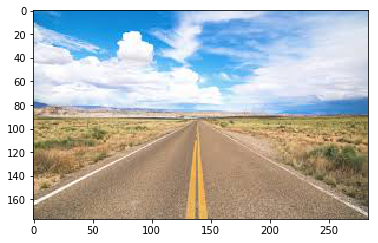

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

image = cv2.imread('photos/road.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## 2 - Canny
Nuevamente aplicaremos Canny para detectar los bordes en la imagen.

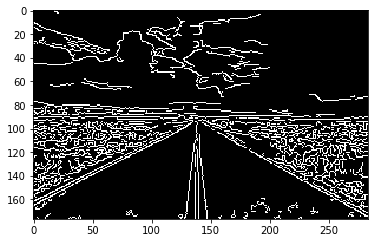

In [2]:
### SOLUCIÓN
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
low_threshold = 90
high_threshold = 180
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.imshow(edges,cmap='gray')

## 3 - Hough
Ahora aplicaremos Hough para encontrar y dibujar las líneas a partir de los bordes encontrados en la imagen anterior.

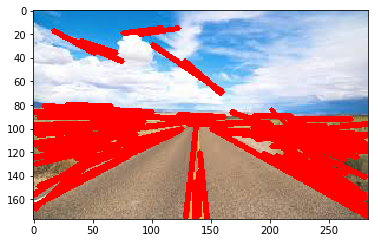

In [3]:
#Parámetros de Hough
rho = 1
theta = np.pi/180
threshold = 50
min_line_length = 30
max_line_gap = 8

#Creo una copia para no destruir la imagen original
line_image = np.copy(image)

# Aplico Hough para detectar líneas
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Dibujo las líneas
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)
# Veo el resultado final
plt.imshow(line_image)

## 4 - Ajuste de parámetros
Puede que nuestra imagen haya detectado demasiadas líneas o demasiado pocas. Ahora iteraremos modificando los parámetros hasta encontrar un resultado satisfactorio.

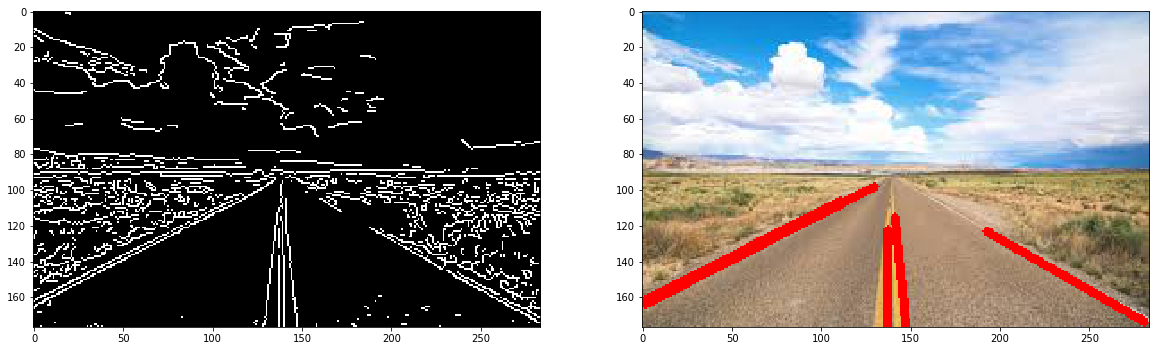

In [4]:
### SOLUCIÓN
low_threshold = 140
high_threshold = 180
rho = 0.8
theta = np.pi/180 * 3
threshold = 40
min_line_length = 50
max_line_gap = 4

edges = cv2.Canny(gray, low_threshold, high_threshold)
line_image = np.copy(image)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)
        
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(edges, cmap='gray')
ax2.imshow(line_image, cmap='gray')